# CRAB AGE PREDICTION

![](crab-on-beach-1.jpg)

## About dataset

The dataset is used to estimate the age of the crab based on the physical attributes. Its a great starting point for classical regression analysis and feature engineering and understand the impact of feature engineering in Data Science domain.

For a commercial crab farmer knowing the right age of the crab helps them decide if and when to harvest the crabs. Beyond a certain age, there is negligible growth in crab's physical characteristics and hence, it is important to time the harvesting to reduce cost and increase profit. The goal of the dataset is:

Exploratory data analysis - Understand how different physical features change with age. Feature Engineering - Define new features using a combination of given data points to help improve model accuracy. Regression Model - Build a regression model to predict the age of the Crab.


### Importing Header Files & Dataset

In [1]:
import pandas as pd                      # For Data Manipulaton
import numpy as np                       # For Numerical Operation

# For Data Visulisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For Ignore the Warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split   # For Spliting the Training & Testing Data
from sklearn.model_selection import cross_val_score    # For Finding the Cross Validation Score
from sklearn.preprocessing import LabelEncoder,RobustScaler    # For Encoding & Scaling

 # For Finding mean absolute error,mean squared error,r2 score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Regressors Used For Prediction
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR 
import pickle                      # For Deployment

### Loading Dataset

In [2]:
df=pd.read_csv('CrabAgePrediction.csv')
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


### Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,3893.0,1.311306,0.300431,0.187500,1.125000,1.362500,1.537500,2.037500
Diameter,3893.0,1.020893,0.248233,0.137500,0.875000,1.062500,1.200000,1.625000
Height,3893.0,0.349374,0.104976,0.000000,0.287500,0.362500,0.412500,2.825000
Weight,3893.0,23.567275,13.891201,0.056699,12.672227,22.792998,32.786197,80.101512
Shucked Weight,3893.0,10.207342,6.275275,0.028349,5.343881,9.539607,14.273973,42.184056
Viscera Weight,3893.0,5.136546,3.104133,0.014175,2.664853,4.861939,7.200773,21.545620
Shell Weight,3893.0,6.795844,3.943392,0.042524,3.713785,6.662133,9.355335,28.491248
Age,3893.0,9.954791,3.220967,1.000000,8.000000,10.000000,11.000000,29.000000


In [5]:
df.shape

(3893, 9)

In [6]:
df.isnull().mean()

Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Weight            0.0
Shucked Weight    0.0
Viscera Weight    0.0
Shell Weight      0.0
Age               0.0
dtype: float64

## Data Visulisation
### Univariate Analysis

#### Hisplot

#### A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

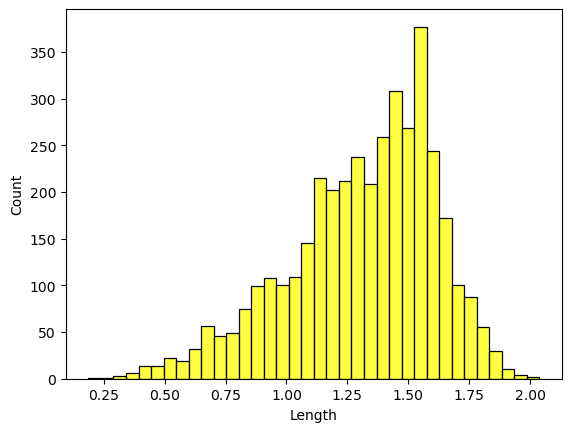

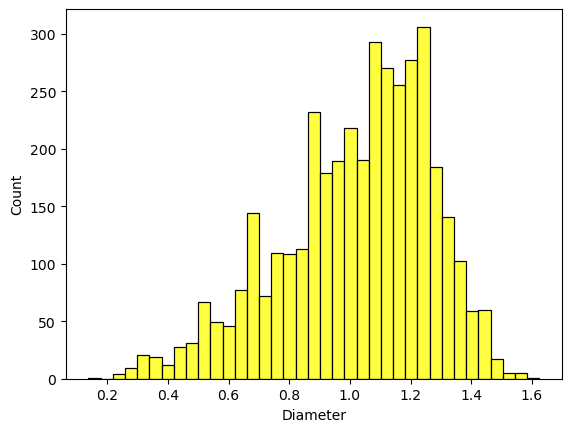

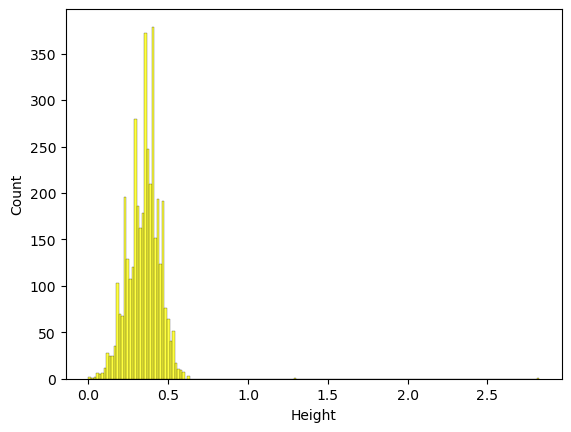

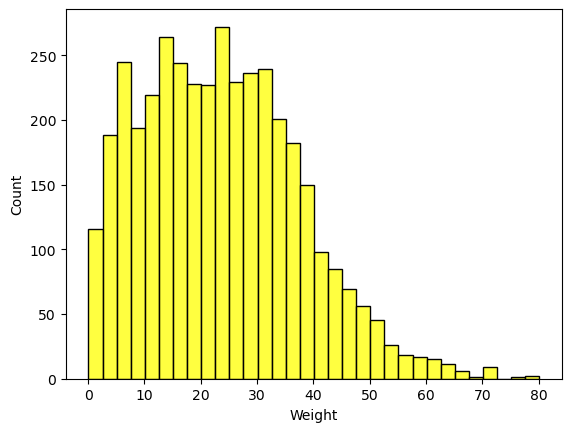

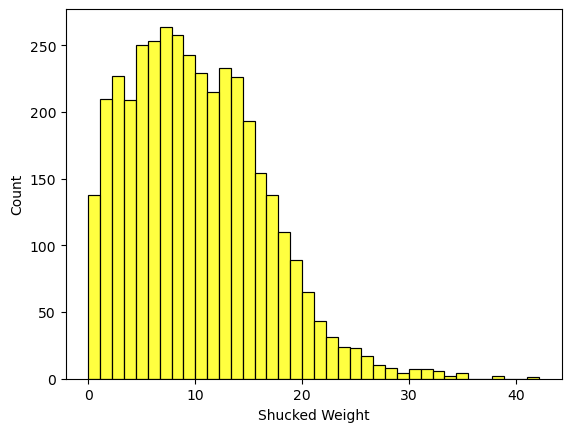

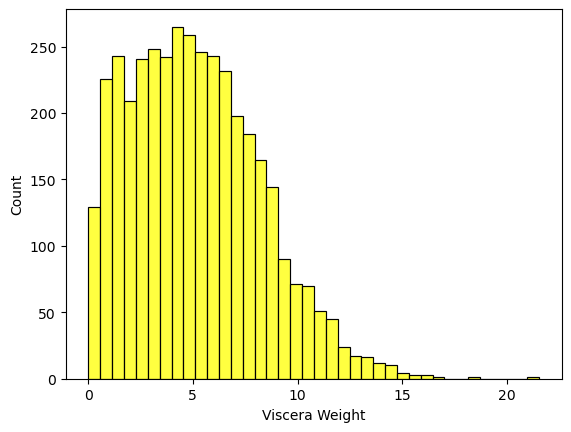

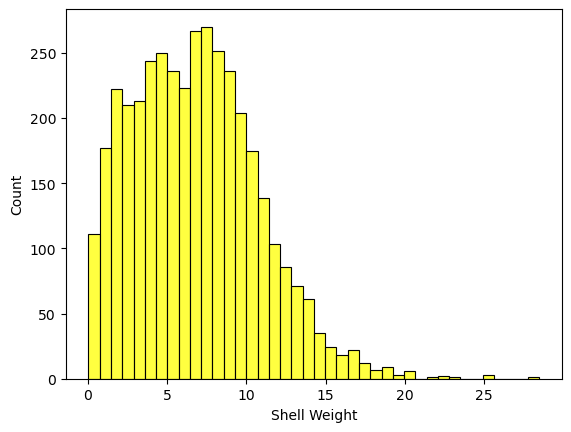

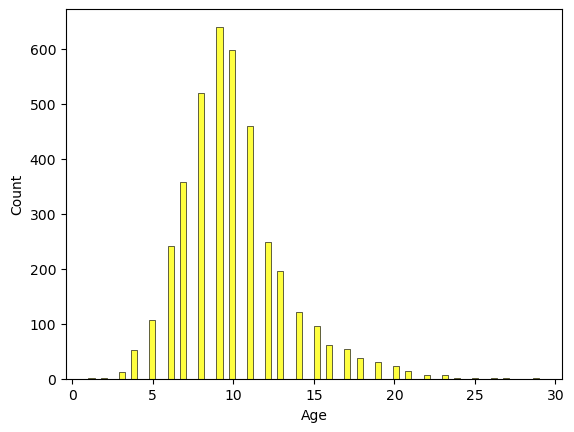

In [7]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.histplot(x=df[i],color='yellow')
        plt.show();

#### KDEplot

#### A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

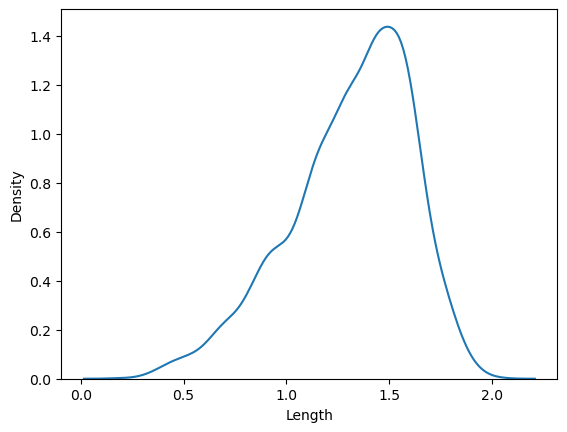

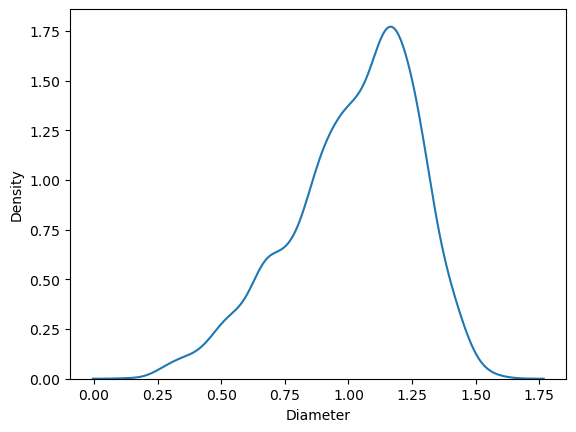

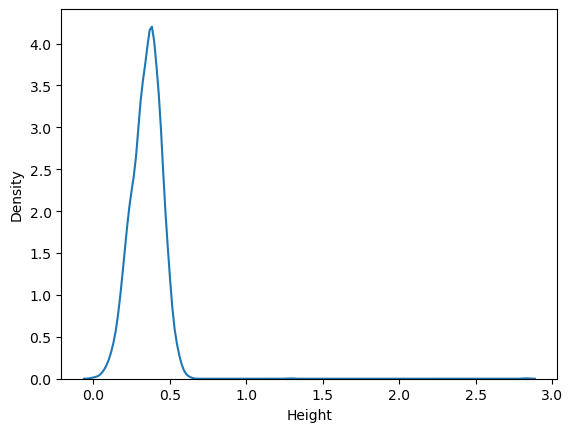

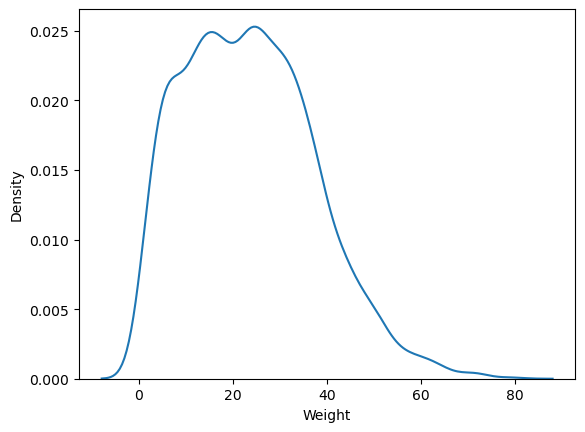

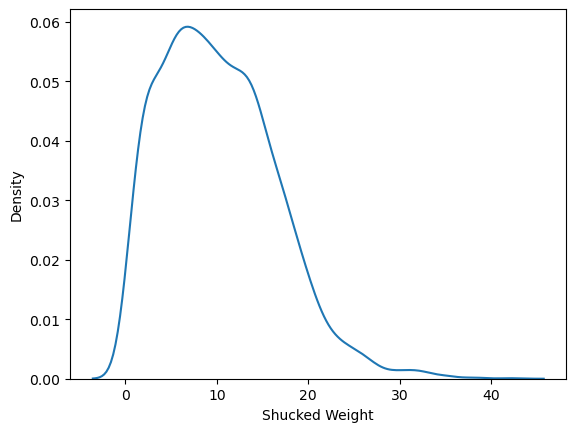

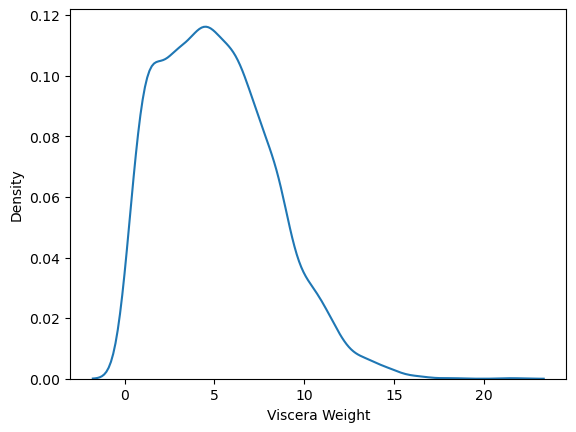

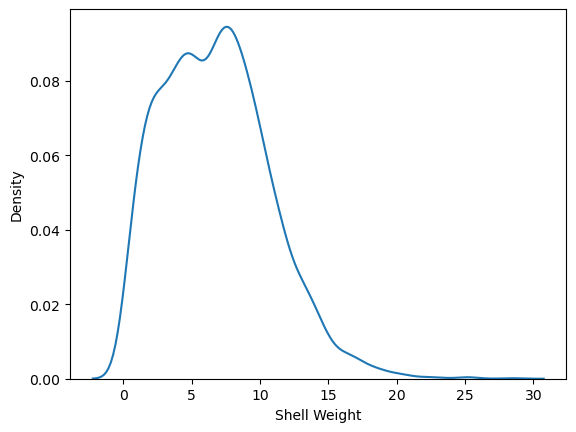

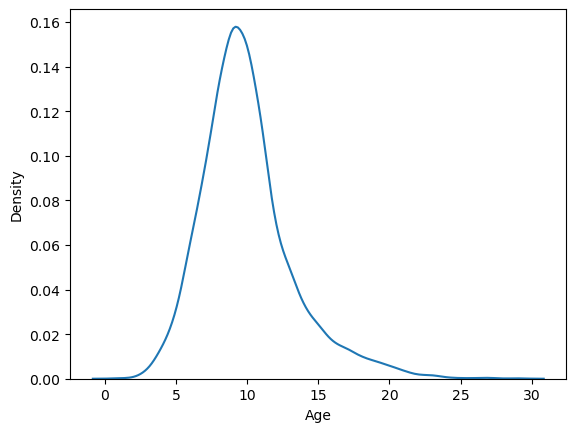

In [8]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.kdeplot(x=df[i])
        plt.show();

#### Stripplot

#### A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

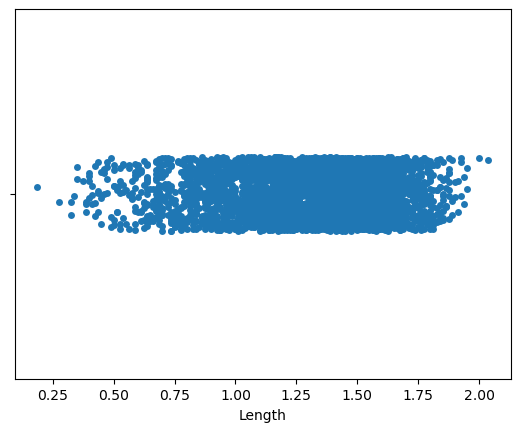

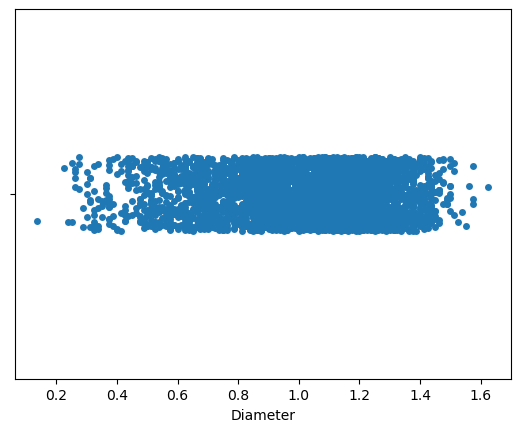

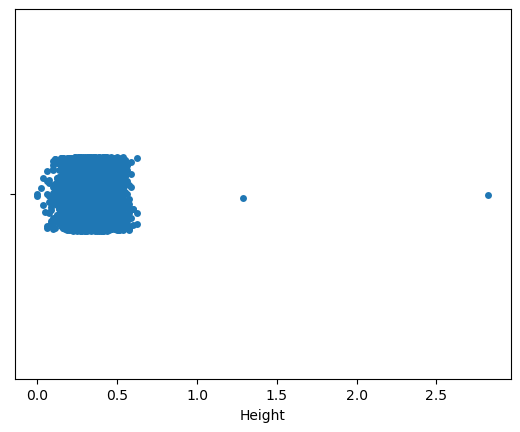

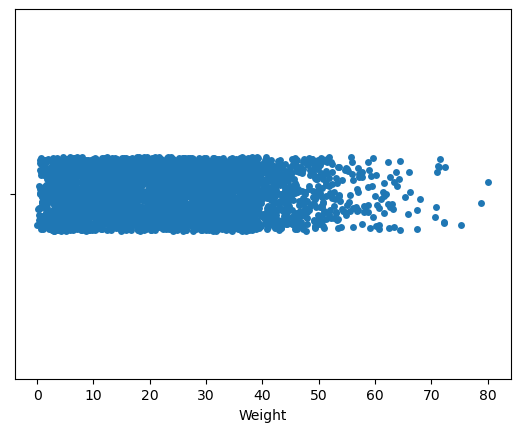

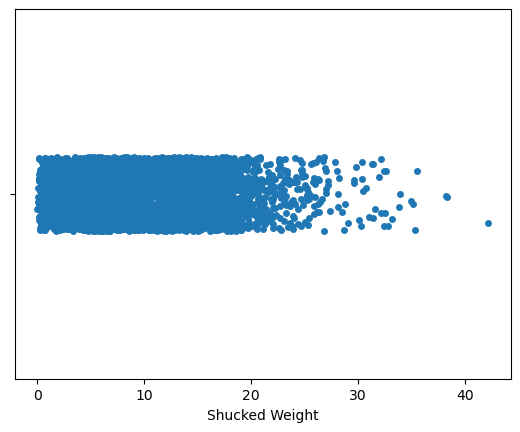

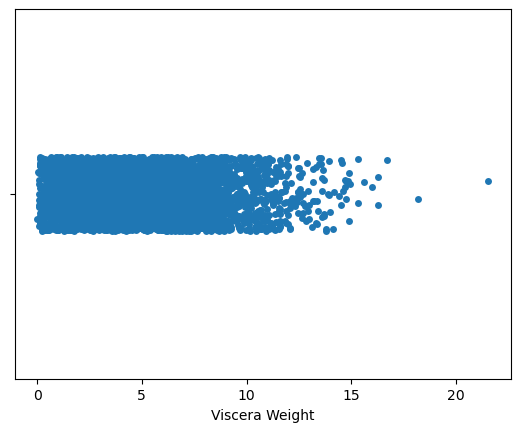

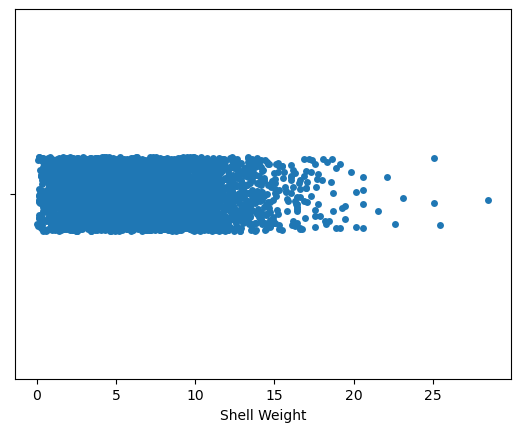

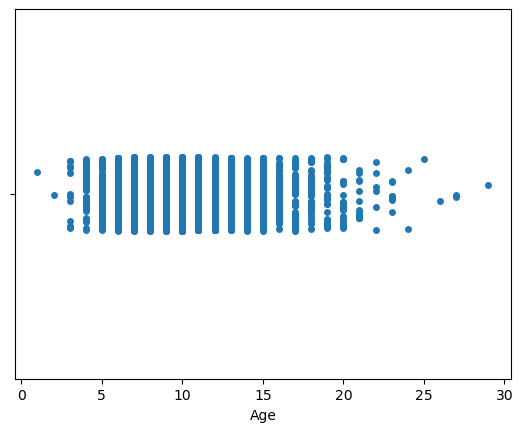

In [9]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.stripplot(x=df[i])
        plt.show();

#### Rugplot

#### This function is intended to complement other plots by showing the location of individual observations in an unobtrusive way.

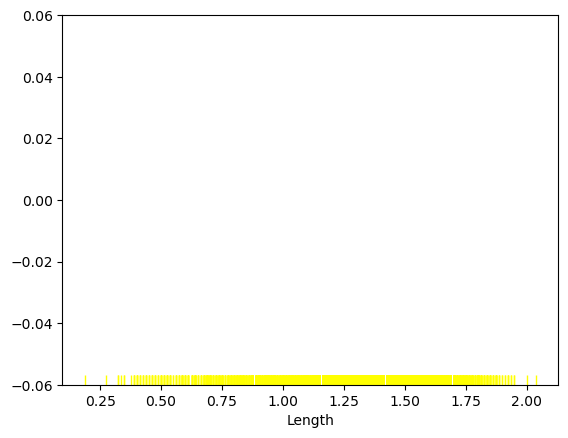

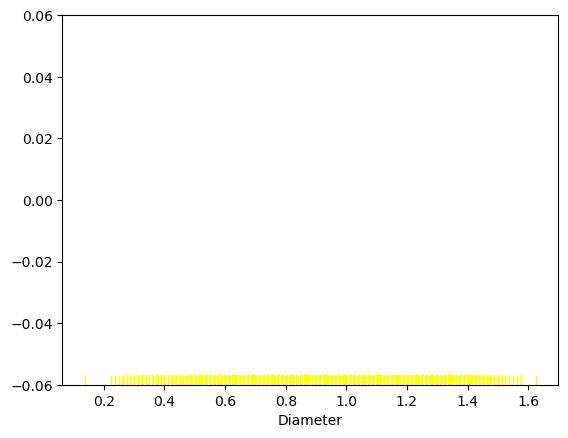

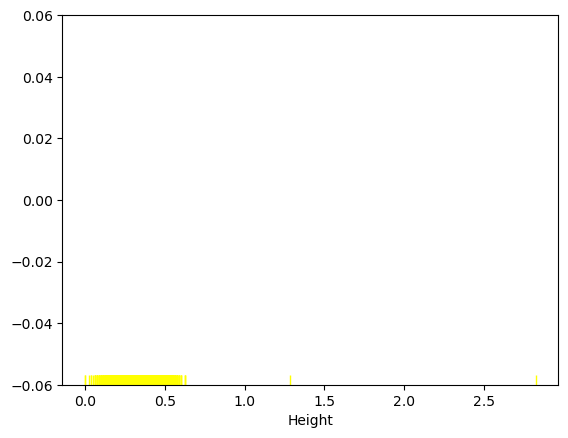

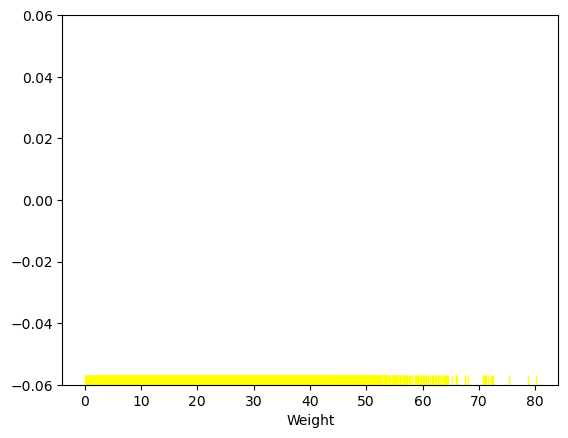

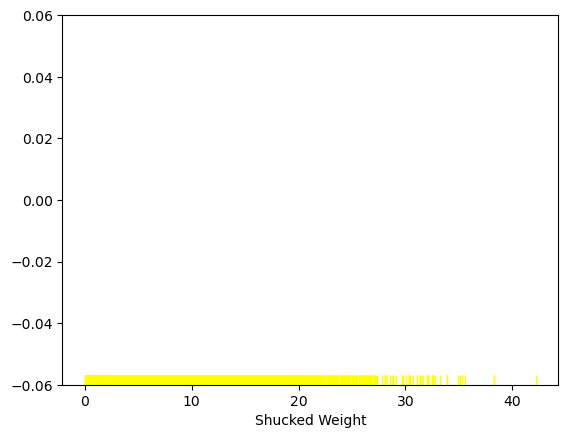

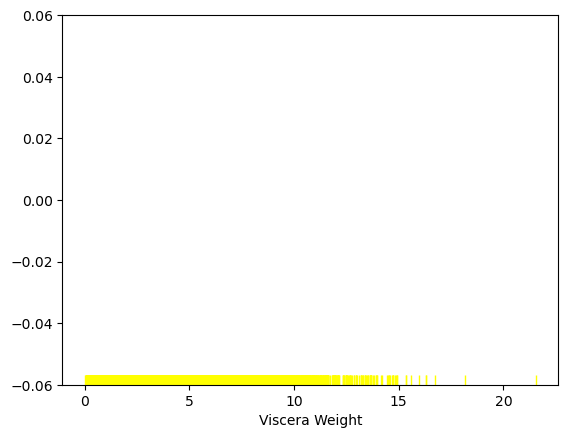

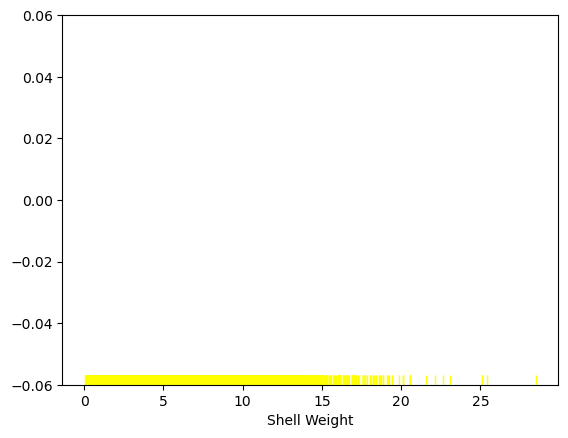

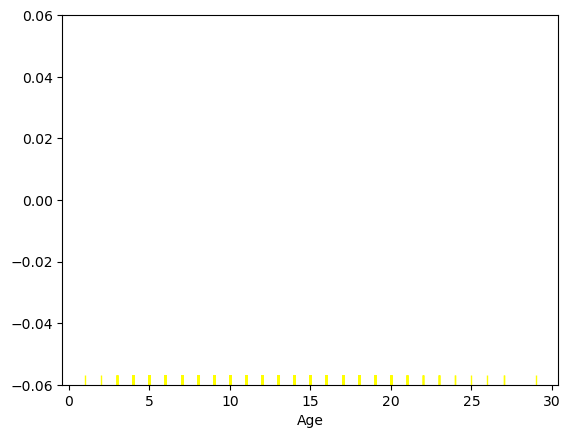

In [10]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.rugplot(x=df[i],color='yellow')
        plt.show();

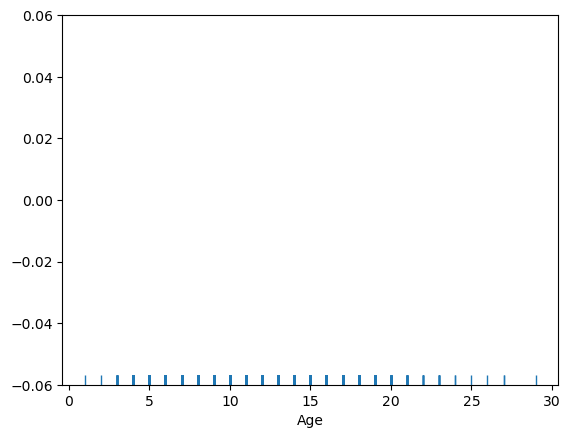

In [11]:
sns.rugplot(df['Age'])
plt.show();

#### Violinplot

#### A violin plot depicts distributions of numeric data for one or more groups using density curves. The width of each curve corresponds with the approximate frequency of data points in each region. Densities are frequently accompanied by an overlaid chart type, such as box plot, to provide additional information.

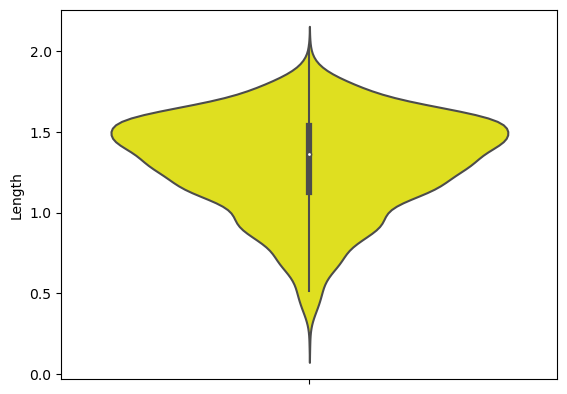

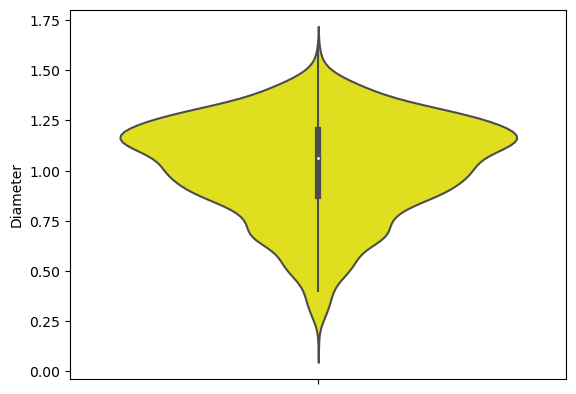

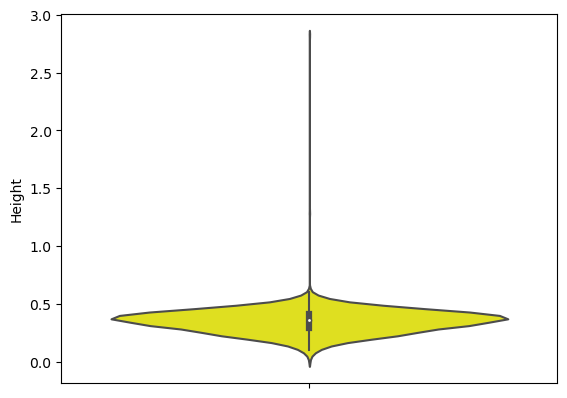

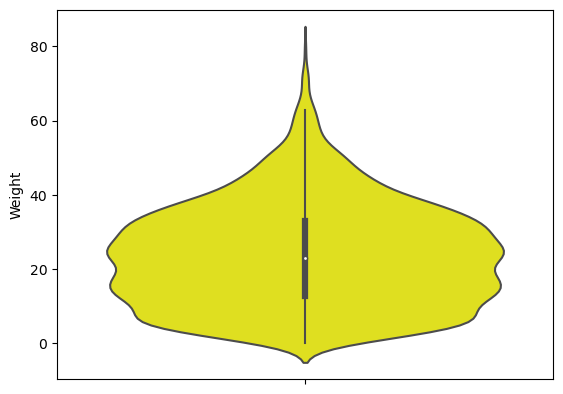

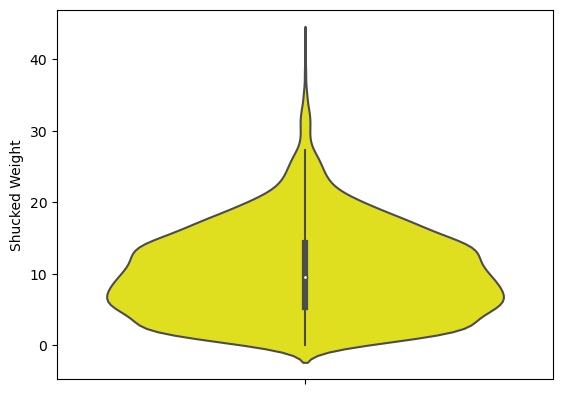

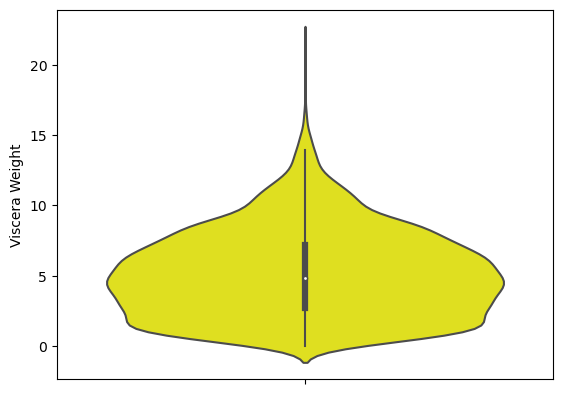

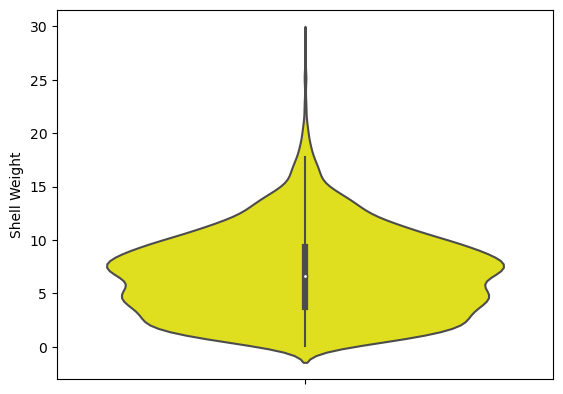

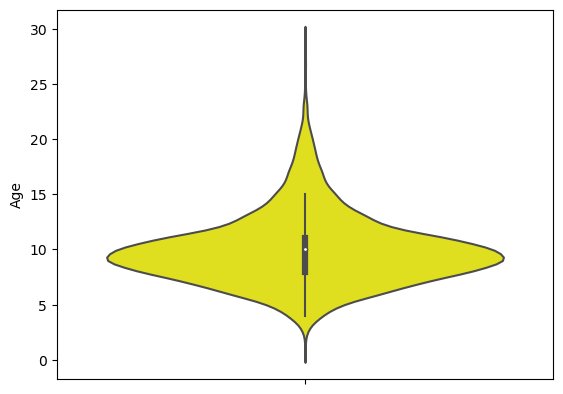

In [12]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.violinplot(y=df[i],color='yellow')
        plt.show();

#### Displot

#### This function provides access to several approaches for visualizing the univariate or bivariate distribution of data, including subsets of data defined by semantic mapping and faceting across multiple subplots. 

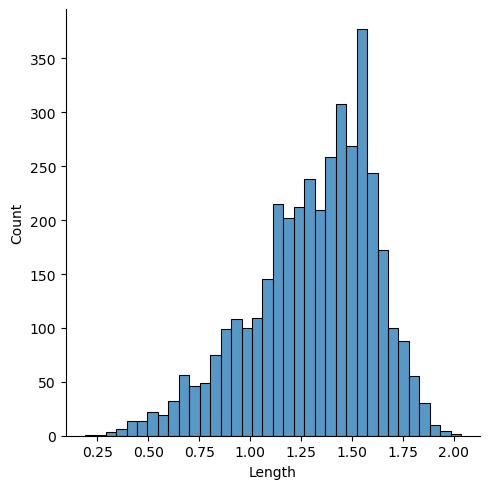

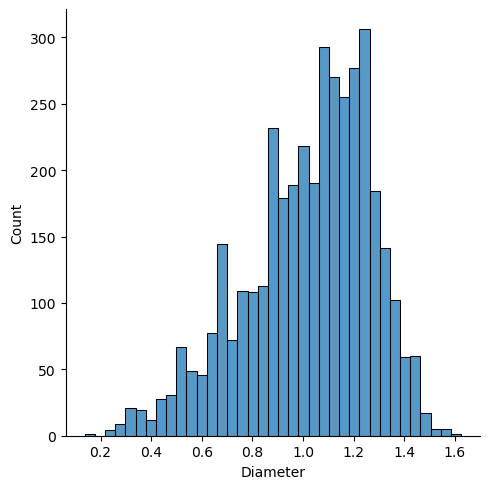

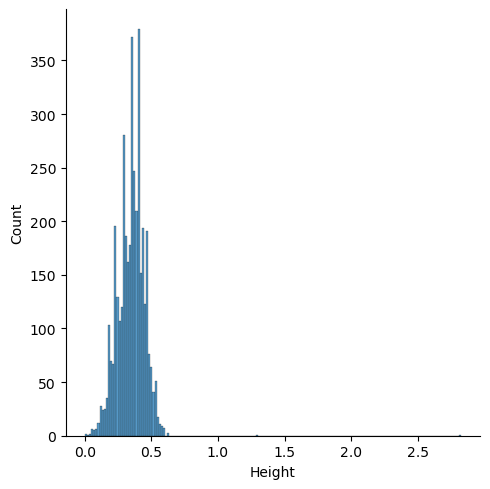

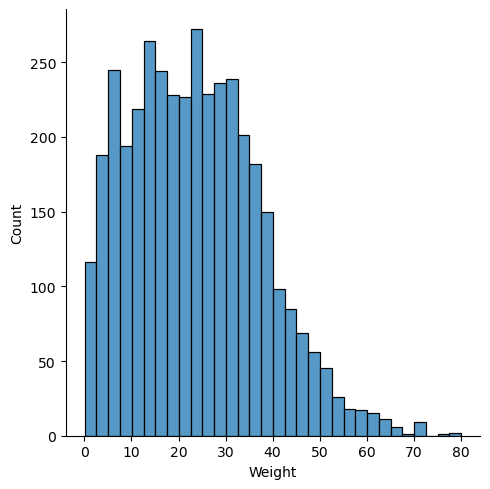

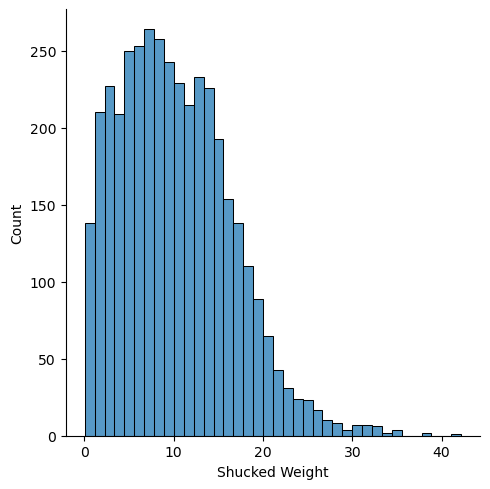

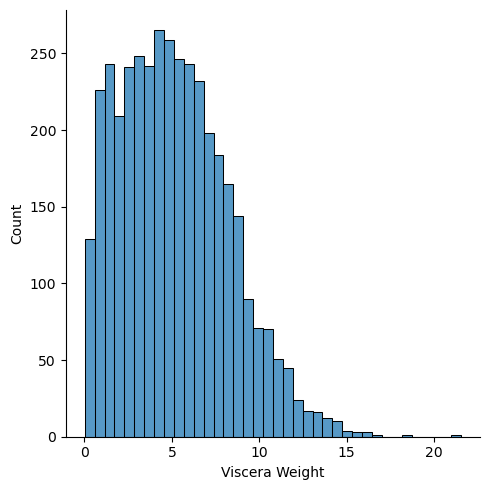

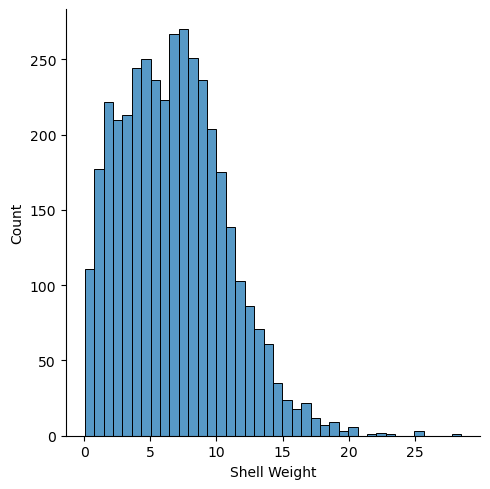

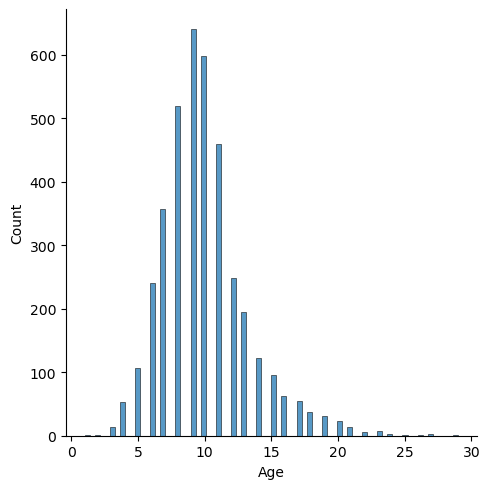

In [13]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.displot(x=df[i])
        plt.show();

## Outlier Treatment

#### To Remove outliers From the Dataset

In [14]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [15]:
for column in df.columns:
    if df[column].dtype!='object':
        UL,LL=outlier_limit(df[column])
        df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

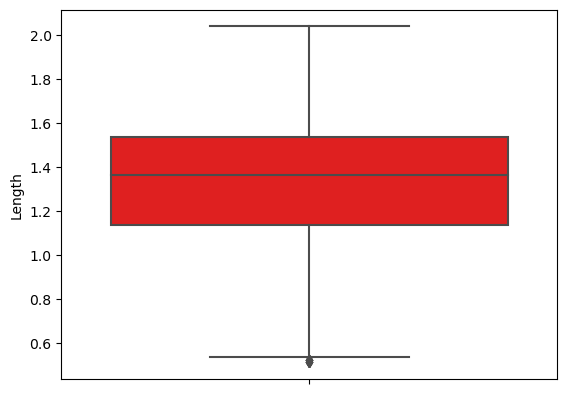

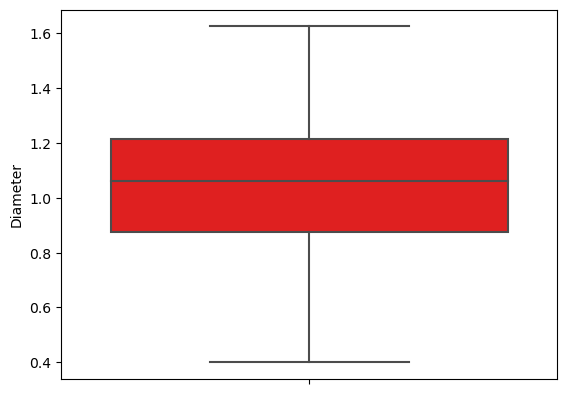

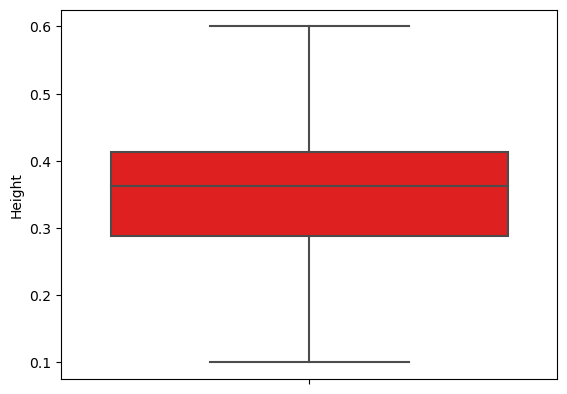

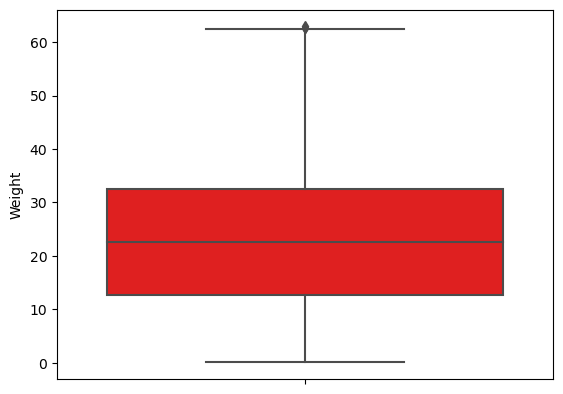

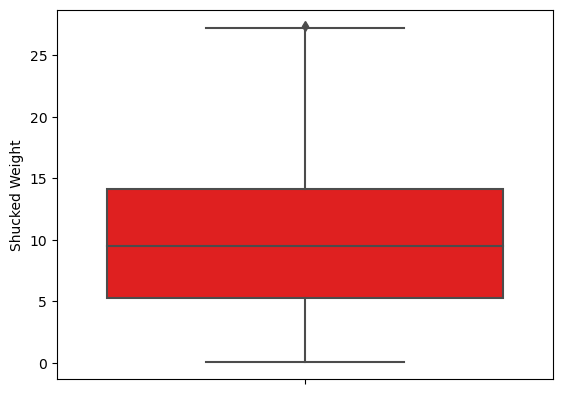

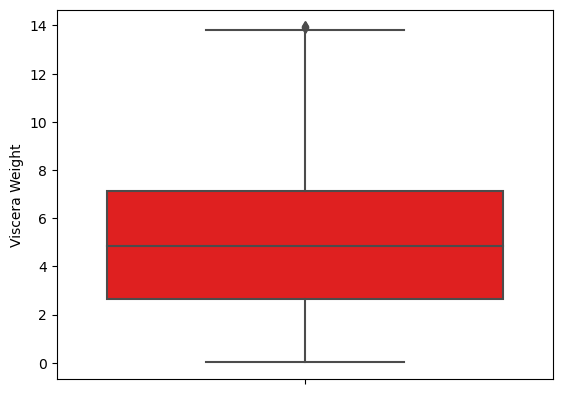

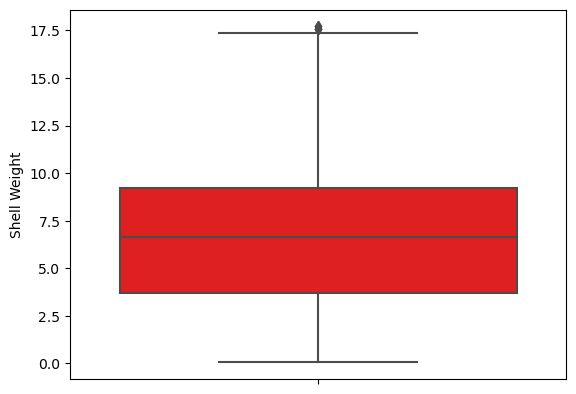

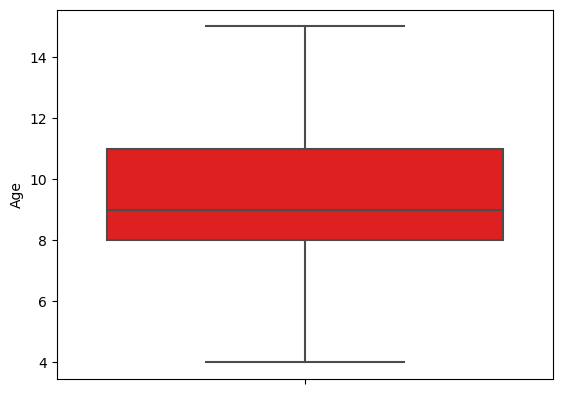

In [16]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i],color='red')
        plt.show();

#### After the outlier treatment there will be some 'nan' values. To remove that nan values weuse dropna

In [17]:
df.dropna(inplace=True)

### Boxplot After Outlier Treatment

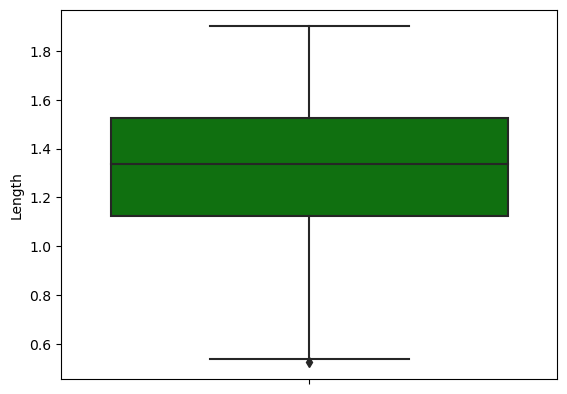

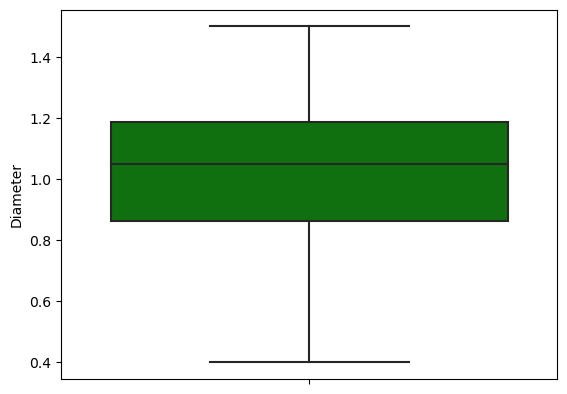

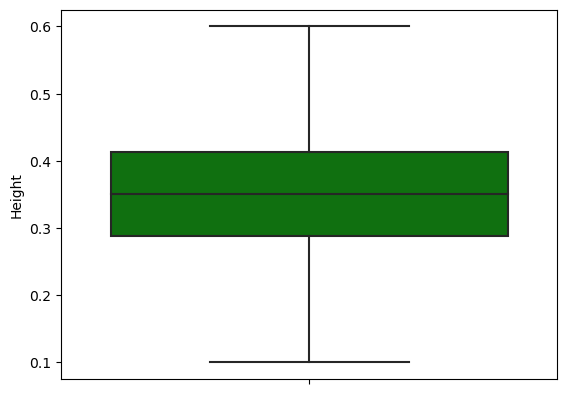

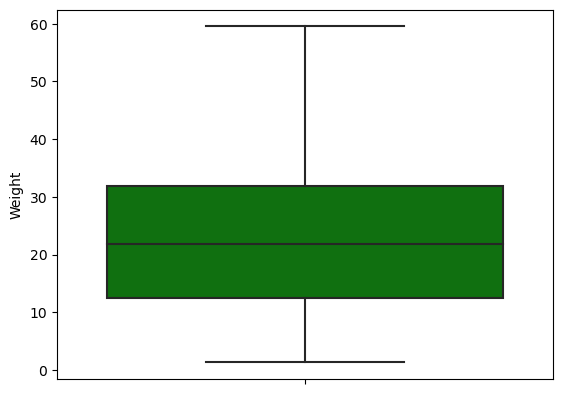

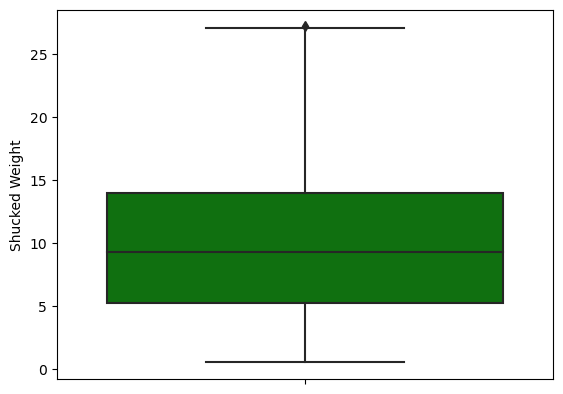

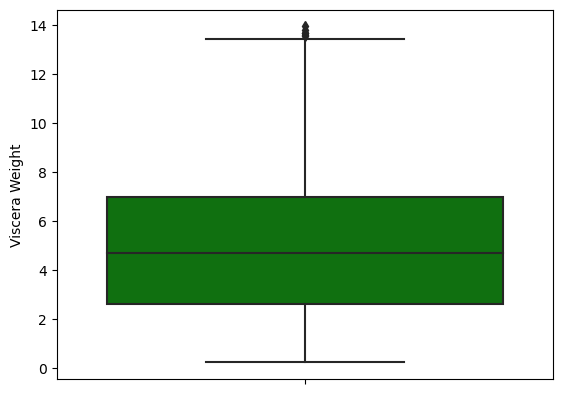

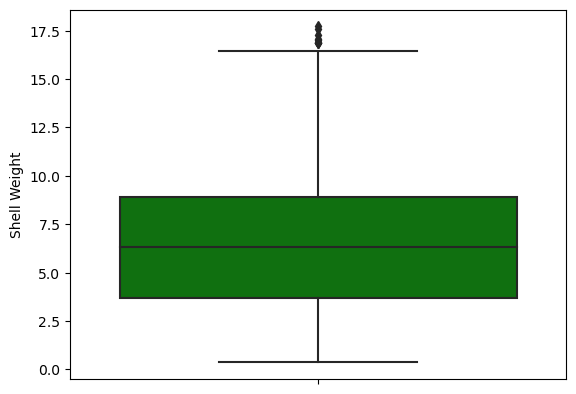

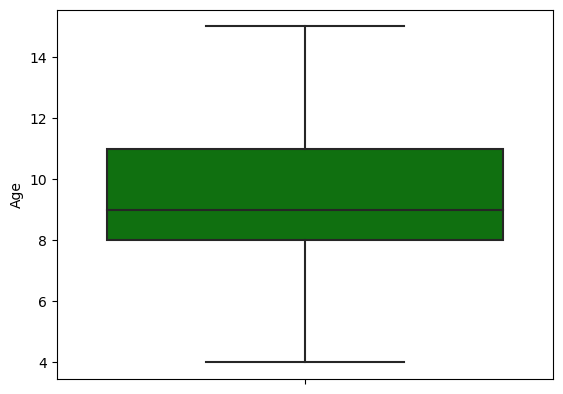

In [18]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i],color='green')
        plt.show();

In [19]:
df.shape

(3526, 9)

## Multivariate Analysis

#### Pairplot

#### This function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column

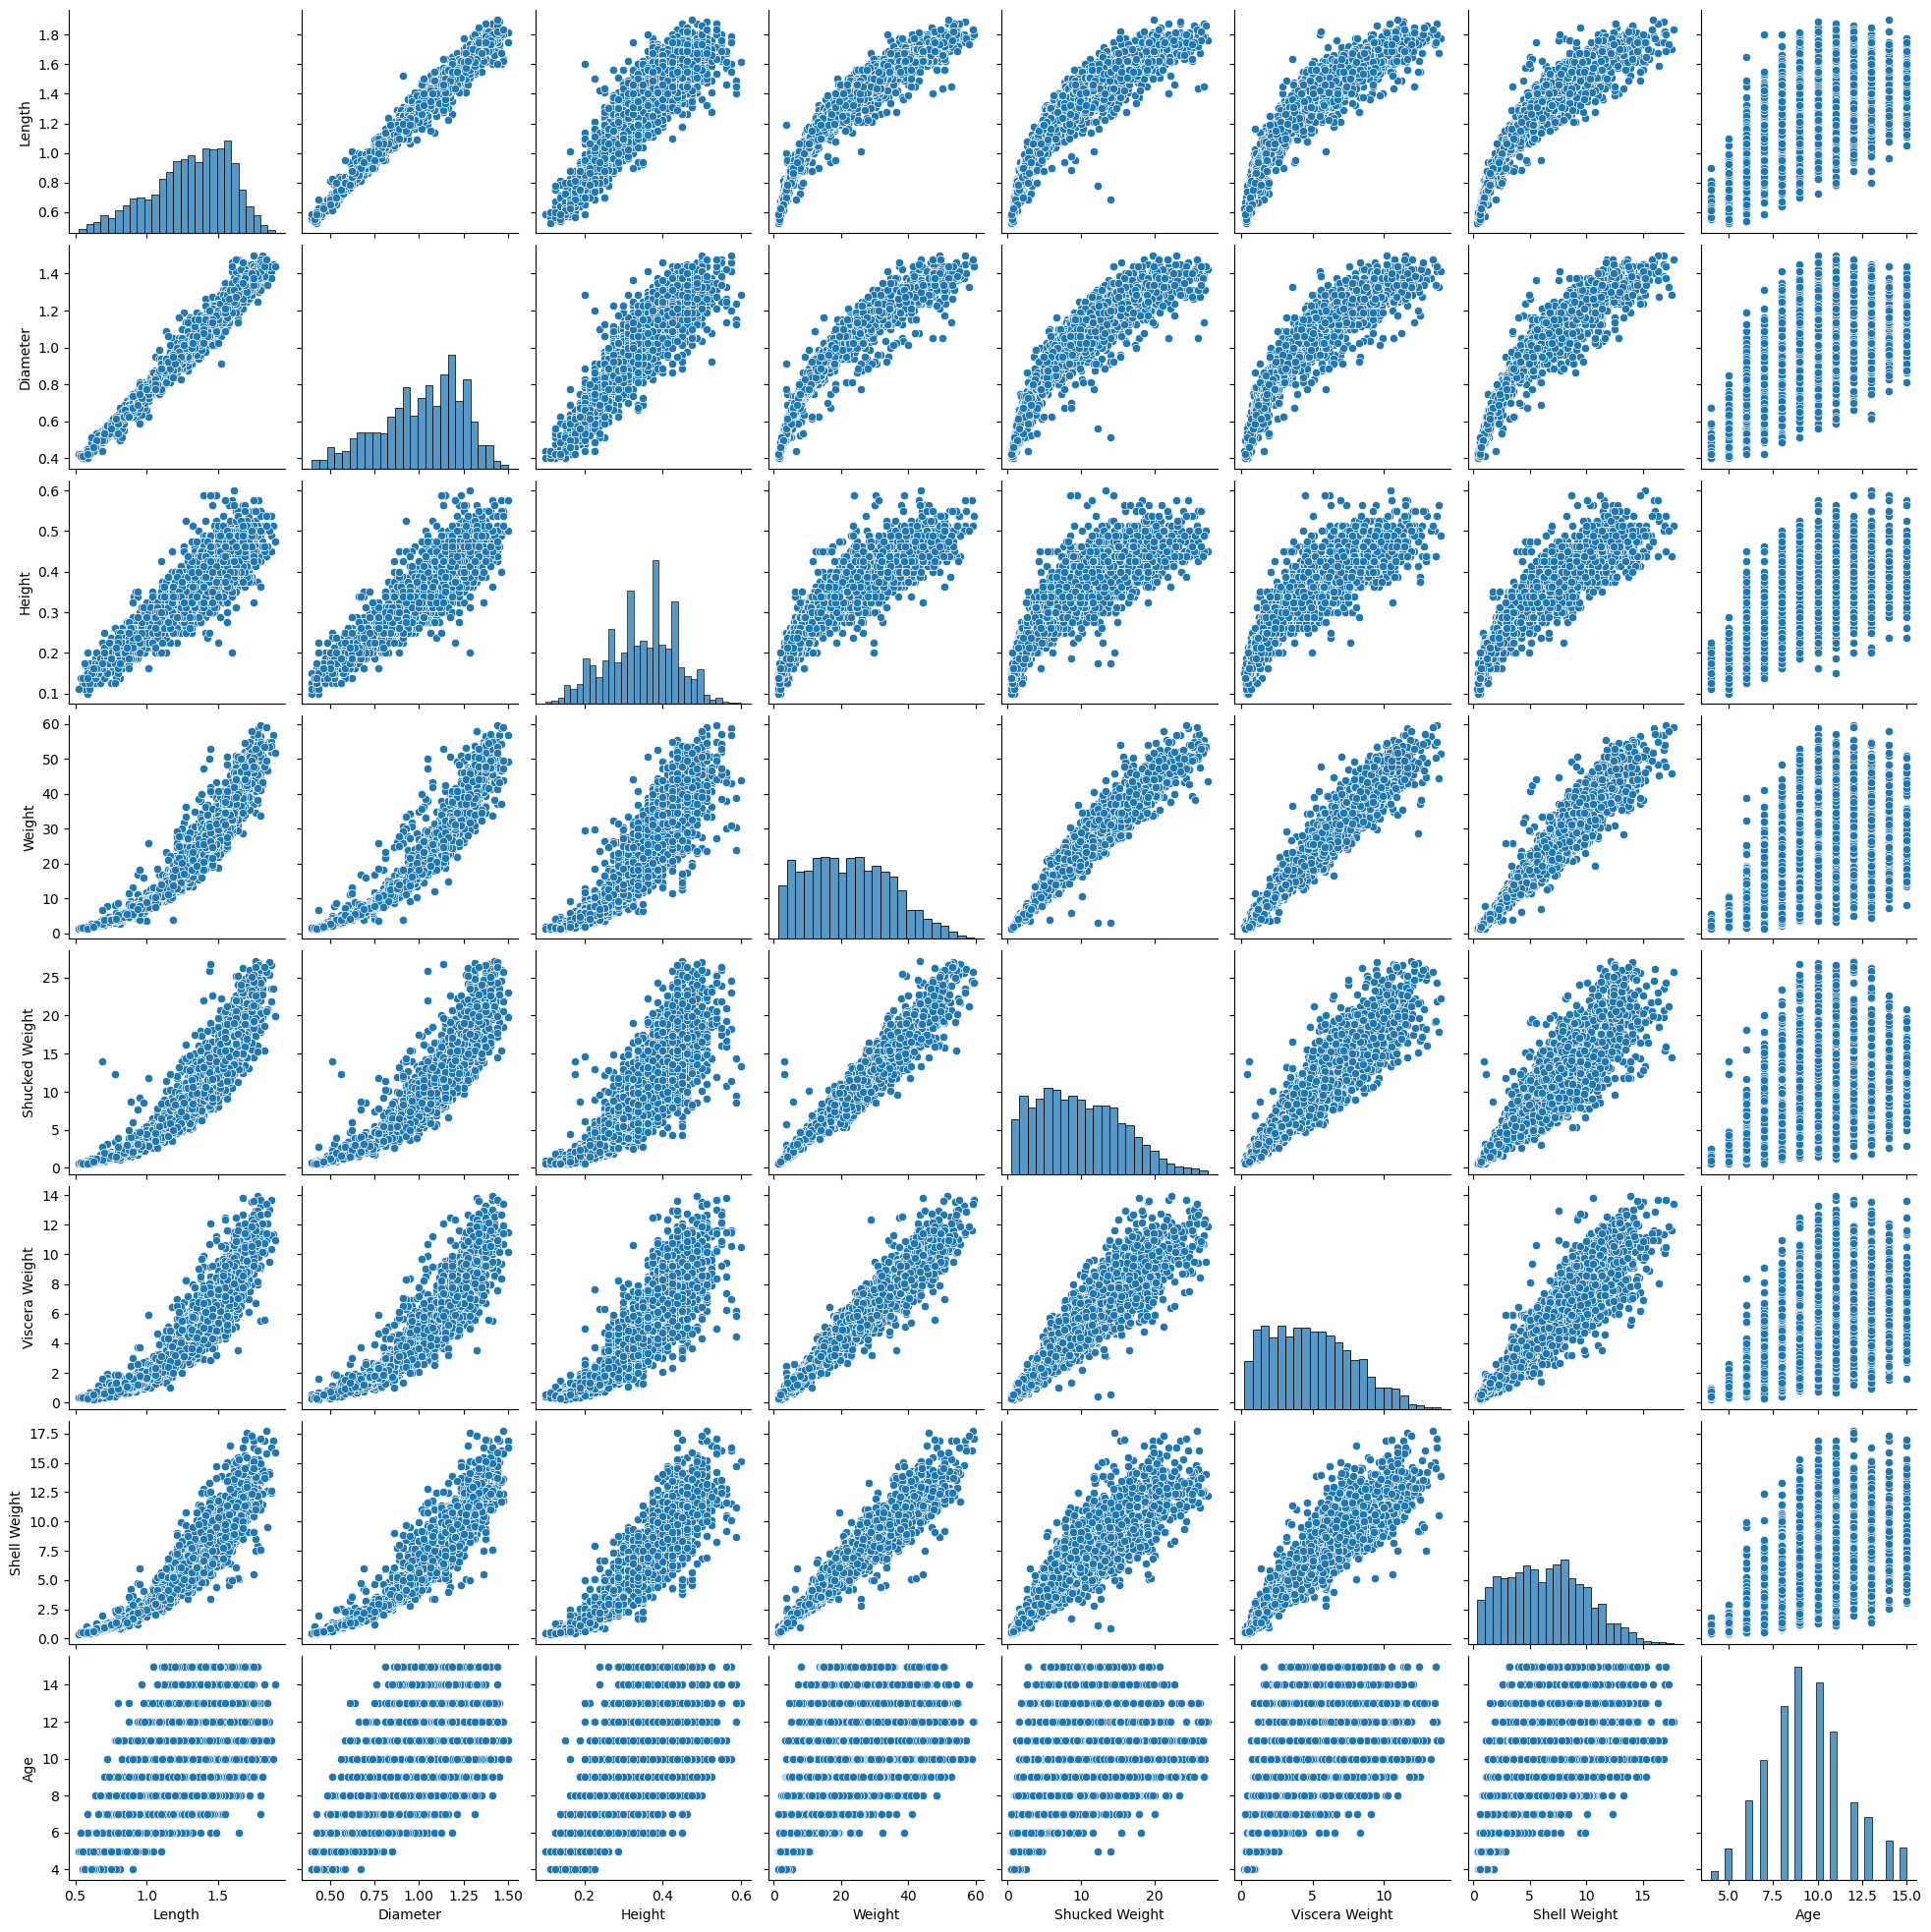

In [20]:
sns.pairplot(df)

#### Lineplot

#### A line plot is a way to display data along a number line. Line plots are also called dot plots.

<Axes: xlabel='Diameter', ylabel='Shell Weight'>

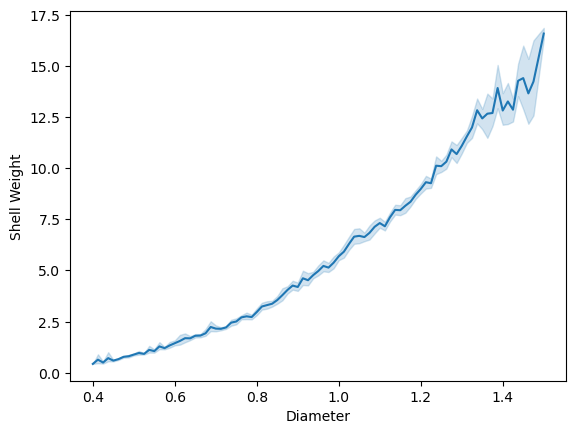

In [21]:
sns.lineplot(x='Diameter', y='Shell Weight', data=df)

#### Countplot

<Axes: xlabel='Sex', ylabel='count'>

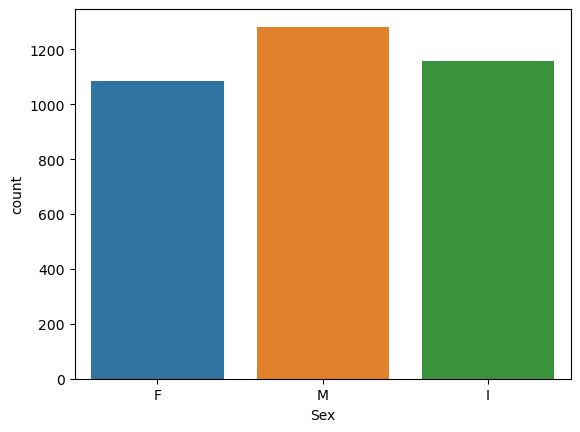

In [22]:
sns.countplot(x = 'Sex', data =df)

In [23]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

#### Heatmap

#### A heatmap (aka heat map) depicts values for a main variable of interest across two axis variables as a grid of colored squares. The axis variables are divided into ranges like a bar chart or histogram, and each cell’s color indicates the value of the main variable in the corresponding cell range

<Axes: >

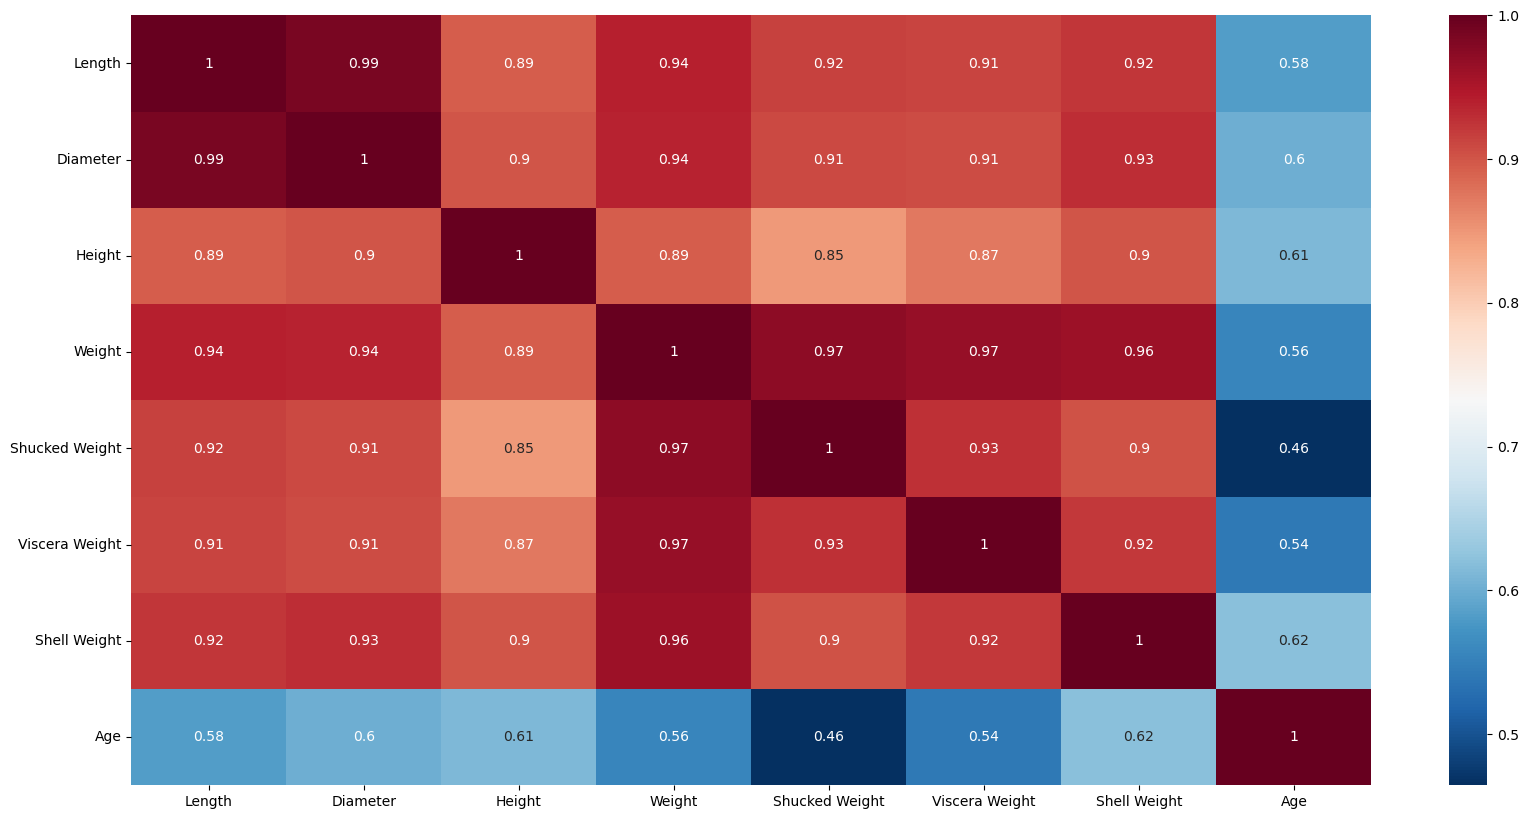

In [24]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='RdBu_r')

## Correlation Analysis

#### Correlation between target column and other columns finds using heatmap

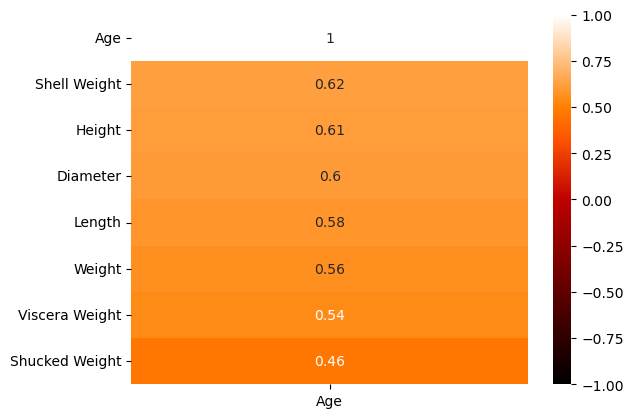

In [25]:
sns.heatmap(df.corr()[['Age']].sort_values(by='Age',ascending=False),vmin=-1,vmax=1,annot=True,cmap='gist_heat');

## Cross Validation

### Choosing X & Y, Scaling & Fitting

In [26]:
# Choosing dependend & independent variables

x=df[['Shell Weight','Height','Diameter','Length','Weight','Viscera Weight','Shucked Weight']].values
y=df[['Age']].values

### Scaling & Fitting to x

#### Scaling is for normalising the range of features in dataset

In [27]:
r=RobustScaler()

In [28]:
x=r.fit_transform(x)

### Finding the Best Model

In [29]:
models={
        'LinearRegression':LinearRegression(),
        'Ridge':Ridge(),
        'LinearSVR':LinearSVR(),
        'DecisionTreeRegressor':DecisionTreeRegressor(),
        'GradientBoostingRegressor':GradientBoostingRegressor(),
        'AdaBoostRegressor':AdaBoostRegressor(),
        'RandomForestRegressor':RandomForestRegressor()
       }

In [30]:
for name,model in models.items():
    sc=cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=10,n_jobs=-1)
    print('cross_validation_model:{}'.format(name))
    rmse=np.sqrt(-sc)
    rmse_avg=np.mean(rmse)
    print('AVERAGE_RMSE',rmse_avg)
    print('*'*100)

cross_validation_model:LinearRegression
AVERAGE_RMSE 1.6768829731266002
****************************************************************************************************
cross_validation_model:Ridge
AVERAGE_RMSE 1.6768558332146495
****************************************************************************************************
cross_validation_model:LinearSVR
AVERAGE_RMSE 1.7064988114668977
****************************************************************************************************
cross_validation_model:DecisionTreeRegressor
AVERAGE_RMSE 2.27282234786166
****************************************************************************************************
cross_validation_model:GradientBoostingRegressor
AVERAGE_RMSE 1.6154405901496258
****************************************************************************************************
cross_validation_model:AdaBoostRegressor
AVERAGE_RMSE 1.8254153753434643
********************************************************************

### Selecting the model as Gradient Booster Regression

In [31]:
model=GradientBoostingRegressor()

### Dividing the Training & Testing Data & Performs Training

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=0)

#### Training the model & Display the scores of different tests

In [33]:
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [34]:
training_score = model.score(x_train, y_train)*100
training_score

76.2013439730575

In [35]:
testing_score=model.score(x_test,y_test)*100
testing_score

47.3144493976766

In [36]:
R2_score=r2_score(y_test,model.predict(x_test))*100
mae=mean_absolute_error(y_test,model.predict(x_test))
mse=mean_squared_error(y_test,model.predict(x_test))
print('R2_score is',R2_score)
print('MAE is',mae)
print('MSE is',mse)

R2_score is 47.3144493976766
MAE is 1.3178456566403338
MSE is 2.868410765077245


### Y_Prediction

In [37]:
y_pred = model.predict(x)
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=('ACTUAL','PREDICTION'),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTION
0,9.0,9.590668
1,6.0,6.658998
2,6.0,7.848829
3,10.0,10.046981
4,6.0,7.062921


### Plotting the Model using Scatterplot

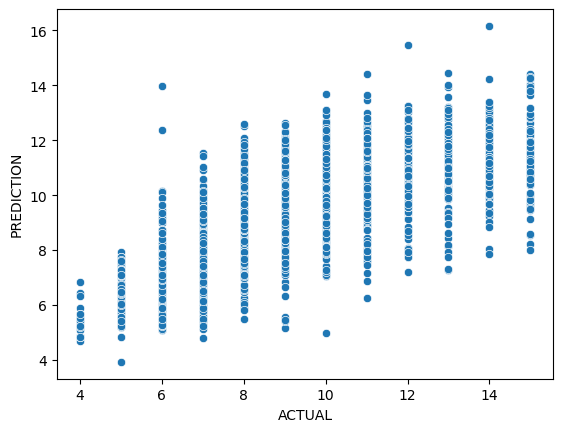

In [38]:
sns.scatterplot(data=OUTPUT,x='ACTUAL',y='PREDICTION');

In [39]:
model.score(x,y)

0.5313782357292027

#### Dumping the model

In [40]:
pickle.dump(model,open('MODEL.pkl','wb'))